In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [114]:
data = pd.read_csv('archive/Pokemon.csv')
num_data=data.drop('#', axis=1) # redundant column
num_data=num_data.drop('Name', axis=1) # redundant column
num_data=num_data.drop('Type 1', axis=1) # redundant column
num_data=num_data.drop('Type 2', axis=1) # redundant column
num_data=num_data.drop('Legendary', axis=1) # redundant column
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [28]:
num_data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [29]:
x_all = num_data.drop('Generation', axis=1)
x_all

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50
796,700,50,160,110,160,110,110
797,600,80,110,60,150,130,70
798,680,80,160,60,170,130,80


In [30]:
def arr_to_df(arr_scaled,df):
    res = pd.DataFrame(arr_scaled, columns=df.columns)
    return res

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_all, num_data['Generation'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train,x_all)
X_test_df = arr_to_df(X_test,x_all)

X_train_df.shape, X_test_df.shape

((640, 7), (160, 7))

In [33]:
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(x_all)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp,x_all)
data_cs11_scaled

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853
...,...,...,...,...,...,...,...
795,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341
796,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611
797,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310
798,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635


In [34]:
data_cs11_scaled.describe()


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-7.993606e-17,-2.660372e-16,-1.355860e-16,2.498002e-17,2.120526e-16,-1.171285e-16,-7.842685e-17
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-2.127839e+00,-2.674852e+00,-2.281379e+00,-2.209039e+00,-1.920993e+00,-1.866223e+00,-2.178804e+00
25%,-8.766721e-01,-7.546915e-01,-7.399327e-01,-7.650653e-01,-7.054650e-01,-7.875334e-01,-8.015032e-01
50%,1.242618e-01,-1.668874e-01,-1.233542e-01,-1.232993e-01,-2.391303e-01,-6.840691e-02,-1.128526e-01
75%,6.664343e-01,4.209167e-01,6.473688e-01,5.184667e-01,6.782494e-01,6.507196e-01,7.479606e-01
max,2.876830e+00,7.278632e+00,3.421972e+00,5.010829e+00,3.705602e+00,5.684605e+00,3.846888e+00


In [35]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

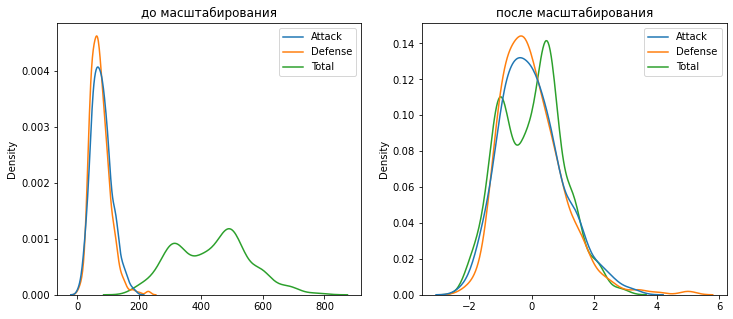

In [59]:
draw_kde(['Attack', 'Defense', 'Total'], num_data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

Крайне сильно заметны изменения колонки total, теперь она более соответствует остальным, а не выглядит, как один большой выброс

In [60]:
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp,x_all)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp,x_all)

In [61]:
data_cs12_scaled_train.describe()


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,-1.571659e-16,1.148387e-16,-1.712172e-16,2.005340e-16,1.384309e-16,2.168404e-16,2.234324e-16
std,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00
min,-2.120630e+00,-2.579985e+00,-2.258464e+00,-2.230880e+00,-1.893436e+00,-1.839232e+00,-2.196096e+00
25%,-8.762811e-01,-7.399885e-01,-7.432247e-01,-7.765841e-01,-7.479106e-01,-7.755478e-01,-8.039590e-01
50%,1.191983e-01,-1.767242e-01,-1.371291e-01,-1.302302e-01,-2.244585e-01,-6.642487e-02,-1.078906e-01
75%,6.584163e-01,4.334789e-01,6.204903e-01,5.161237e-01,6.858929e-01,6.426981e-01,7.621949e-01
max,2.856767e+00,6.957958e+00,3.347920e+00,5.040601e+00,3.690053e+00,5.606559e+00,3.894502e+00


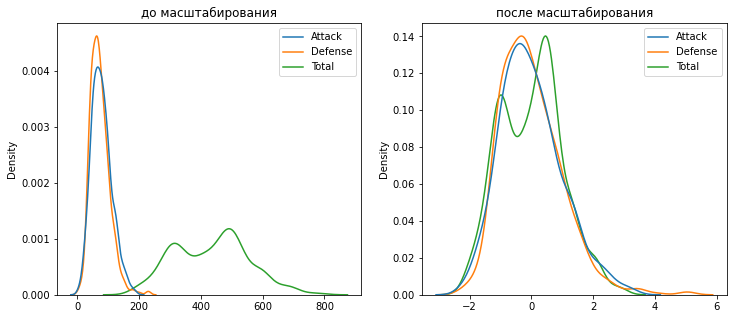

In [63]:
draw_kde(['Attack', 'Defense', 'Total'], num_data, data_cs12_scaled_train, 'до масштабирования', 'после масштабирования')


In [64]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [66]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(x_all)
data_cs21_scaled.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.000881,-0.001762,-0.002831,-0.000832,0.002300,0.000138,0.001014
std,0.199938,0.100530,0.175445,0.138593,0.177839,0.132519,0.166060
min,-0.426052,-0.270497,-0.402838,-0.306799,-0.339113,-0.247016,-0.360571
25%,-0.176052,-0.077584,-0.132568,-0.106799,-0.123081,-0.104159,-0.132000
50%,0.023948,-0.018529,-0.024459,-0.017910,-0.040200,-0.008921,-0.017714
75%,0.132281,0.040527,0.110676,0.070979,0.122843,0.086317,0.125143
max,0.573948,0.729503,0.597162,0.693201,0.660887,0.752984,0.639429


In [67]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [69]:
data_cs22_scaled_train.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,-4.458239e-17,1.216475e-17,-3.439089e-17,2.467644e-17,3.625572e-17,2.484991e-17,3.094313e-17
std,2.010654e-01,1.049264e-01,1.785076e-01,1.376311e-01,1.792396e-01,1.344091e-01,1.643159e-01
min,-4.260521e-01,-2.704970e-01,-4.028378e-01,-3.067986e-01,-3.391135e-01,-2.470164e-01,-3.605714e-01
25%,-1.760521e-01,-7.758366e-02,-1.325676e-01,-1.067986e-01,-1.339504e-01,-1.041592e-01,-1.320000e-01
50%,2.394792e-02,-1.852854e-02,-2.445946e-02,-1.790972e-02,-4.020041e-02,-8.921131e-03,-1.771429e-02
75%,1.322812e-01,4.544783e-02,1.106757e-01,7.097917e-02,1.228431e-01,8.631696e-02,1.251429e-01
max,5.739479e-01,7.295030e-01,5.971622e-01,6.932014e-01,6.608865e-01,7.529836e-01,6.394286e-01


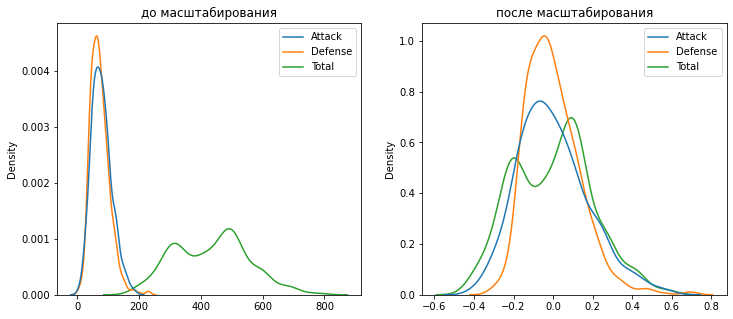

In [70]:
draw_kde(['Attack', 'Defense', 'Total'], num_data, data_cs22_scaled_train, 'до масштабирования', 'после масштабирования')

Сдвиг по оси Х исправлен, а вот амплитуда немного вышла хуже, чем в прошлом способе

In [72]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp,x_all)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp,x_all)

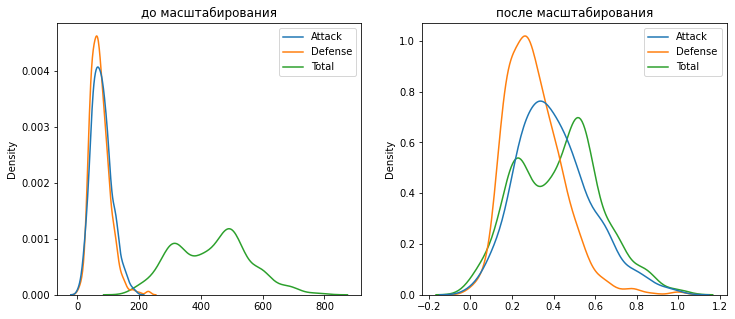

In [74]:
draw_kde(['Attack', 'Defense', 'Total'], num_data, data_cs32_scaled_train, 'до масштабирования', 'после масштабирования')

Результат во многом похож на MeanNormalisation, только теперь и по оси Х сдвиг не полностью устранен

In [77]:
# Point 2

In [76]:
num_data.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [93]:
def diagnostic_plots(df, variable):
    # гистограмма
    df[variable].hist(bins=30)
#     plt.show()

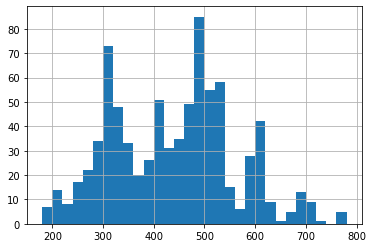

In [95]:
diagnostic_plots(num_data, 'Total')

In [108]:
def get_outlier_boundaries(df, col, typ):
    if typ == 'SIGMA':
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif typ== 'QUANTILE':
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif typ == 'IRQ':
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    

SIGMA
QUANTILE
IRQ


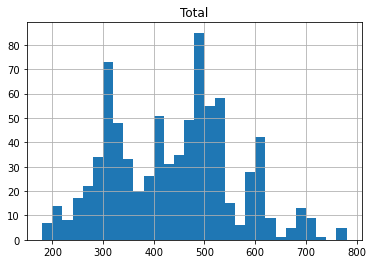

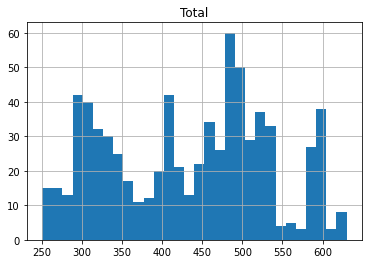

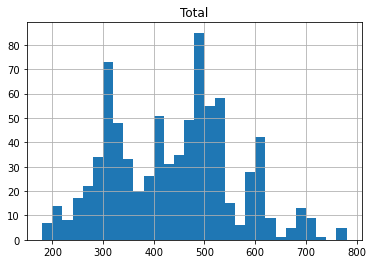

In [111]:
typs = ['SIGMA','QUANTILE','IRQ']
for t in typs:
    col = [ 'Total'] 
    lower_boundary, upper_boundary = get_outlier_boundaries(num_data, col,t)
     # Флаги для удаления выбросов
    outliers_temp = np.where(num_data[col] > upper_boundary, True, np.where(num_data[col] < lower_boundary, True, False))
     # Удаление данных на основе флага
    data_trimmed = num_data.loc[~(outliers_temp), ]  
#     title = 'Поле-{}, строк-{}'.format(col, data_trimmed.shape[0])
    print(t)
    diagnostic_plots(data_trimmed, col)

Видно, что подход с квантилями сразу дает весьма достойный результат

SIGMA
QUANTILE
IRQ


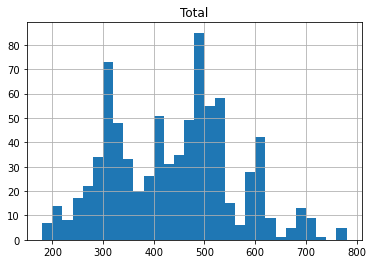

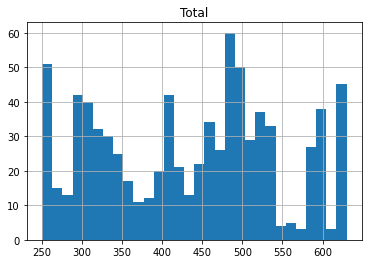

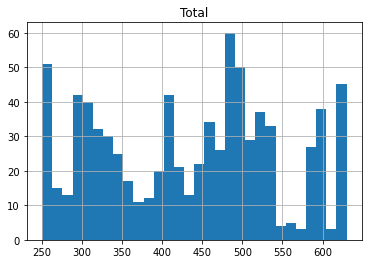

In [112]:
typs = ['SIGMA','QUANTILE','IRQ']
for t in typs:
    col = [ 'Total'] 
    lower_boundary, upper_boundary = get_outlier_boundaries(num_data, col,t)
     # Флаги для удаления выбросов
    outliers_temp = np.where(num_data[col] > upper_boundary, True, np.where(num_data[col] < lower_boundary, True, False))
     # Удаление данных на основе флага
    num_data[col] = np.where(num_data[col] > upper_boundary, upper_boundary, 
                                 np.where(num_data[col] < lower_boundary, lower_boundary, num_data[col]))
    print(t)
    diagnostic_plots(num_data, col)

Замена данных сработала не очень красиво в наших случаях, не просто заменив выбросы, а увеличив их почти до масимальных значений.

<AxesSubplot:>

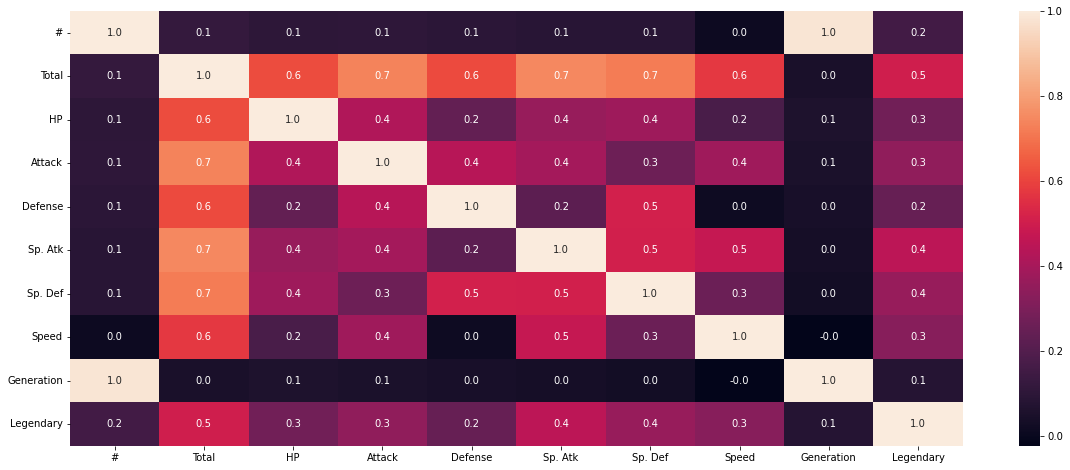

In [117]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,8))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.1f')

In [131]:
dd = pd.read_csv('archive/full_grouped.csv')
dd

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [154]:
dd['time']=pd.to_datetime(dd['Date'],format="%Y-%m-%d")
dd.time

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
35151   2020-07-27
35152   2020-07-27
35153   2020-07-27
35154   2020-07-27
35155   2020-07-27
Name: time, Length: 35156, dtype: datetime64[ns]

In [160]:
dd['dtime'] = dd['Date'].astype('datetime64[s]')


0        22
1        22
2        22
3        22
4        22
         ..
35151    27
35152    27
35153    27
35154    27
35155    27
Name: dtime, Length: 35156, dtype: int64

In [161]:
dd['Day'] = dd.dtime.dt.day
dd.Day

0        22
1        22
2        22
3        22
4        22
         ..
35151    27
35152    27
35153    27
35154    27
35155    27
Name: Day, Length: 35156, dtype: int64

Тут мы из датасета с данными о ковиде взяли поле даты и преобразовали его к типу datime, у которого уже легко взять такие поля, как день-месяц-год